# Training a Simple CNN

In [7]:
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from data.image_dataset_synth import ImageDataset
from training.cnn import ConvNet
from training.train import *
from training.eval import *
from data.convert_labels import *
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Create ImageDataset
train_annotations_file_path = 'data/synthetic/04.2/train/04.2.csv'
train_dir_path = 'data/synthetic/04.2/train'
test_annotations_file_path = 'data/synthetic/04.2/test/04.2.csv'
test_dir_path = 'data/synthetic/04.2/test'

# Can override arguments specifying class boundaries
target_transform = lambda target: convert_labels(target)

train_val_dataset = ImageDataset(
  annotations_file=train_annotations_file_path,
  img_dir=train_dir_path,
  transform=None,
  target_transform=target_transform
)

test_dataset = ImageDataset(
  annotations_file=test_annotations_file_path,
  img_dir=test_dir_path,
  transform=None,
  target_transform=target_transform
)

generator = torch.Generator().manual_seed(0)
train_dataset, val_dataset = random_split(train_val_dataset, [0.9, 0.1], generator=generator)

In [15]:
# Create Dataloader
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=50, shuffle=True)


train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
print(np.unique(train_labels))

Feature batch shape: torch.Size([50, 1, 120, 160])
Labels batch shape: torch.Size([50])
[ 4  5  6  8  9 10 11]


In [16]:
model = ConvNet(input_dims=(160, 120))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

results = train(model, criterion, optimizer, train_loader, epochs=10)

| epoch  1 | train acc 0.312725 |
| epoch  2 | train acc 0.421432 |
| epoch  3 | train acc 0.661515 |
| epoch  4 | train acc 0.813498 |
| epoch  5 | train acc 0.948480 |
| epoch  6 | train acc 0.980938 |
| epoch  7 | train acc 0.992272 |
| epoch  8 | train acc 0.993818 |
| epoch  9 | train acc 0.997424 |
| epoch 10 | train acc 0.998970 |


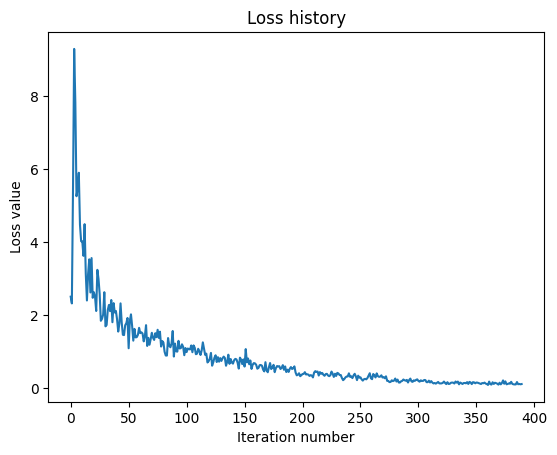

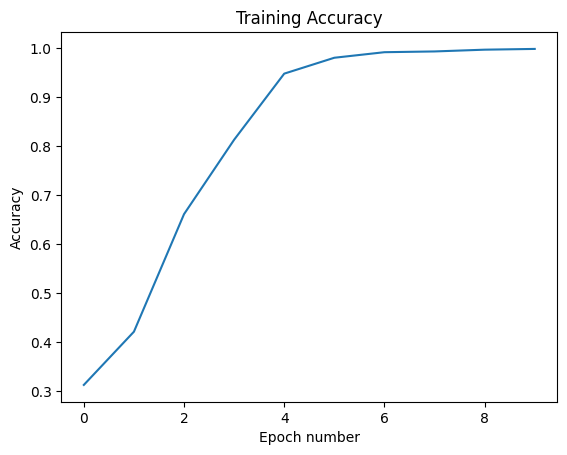

In [17]:
iter_train_loss_list, train_acc_list = results
plt.plot(iter_train_loss_list)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.title('Loss history')
plt.show()

plt.plot(train_acc_list)
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

In [18]:
test_acc = evaluate_acc(model, test_loader)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.5375000238418579
